# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Ansari Mohammed Ali Nasim</h2>

# Data

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading datasets
df=pd.read_csv('winequality.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Analyse missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

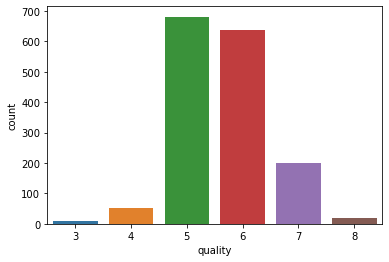

In [6]:
# Our label distribution (countplot)
sns.countplot(x='quality',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

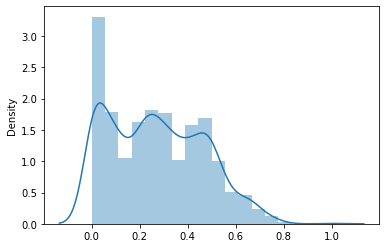

In [7]:
# Example EDA (distplot)
sns.distplot(x=df['citric acid'])

<AxesSubplot:xlabel='density', ylabel='quality'>

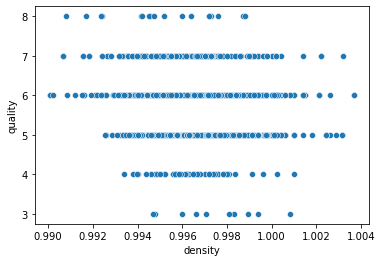

In [8]:
sns.scatterplot(x='density',y='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

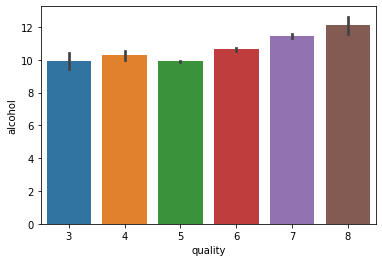

In [9]:
sns.barplot(x=df['quality'],y=df['alcohol'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [10]:
#Are there any duplicated values?
df.duplicated().sum()

240

In [11]:
#dropping duplicates value
df.drop_duplicates(inplace=True,ignore_index=True)

In [12]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [13]:
#setting X and Y variable
X=df.drop('quality',axis=1)
Y=df['quality']


In [14]:
#Scaling values in dataframe
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X= MinMaxScaler().fit_transform(X)
X

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.11504425, 0.29452055, 0.1       , ..., 0.61417323, 0.25748503,
        0.43076923],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [15]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)
print(y_test.mean())
print(y_train.mean()) 
print(Y.mean())

5.622549019607843
5.6235541535226075
5.6232523914643116


In [16]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.
#### Using Logistic Regression

In [17]:
#importing logistic regression and training the model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=42)

In [18]:
# fitting the model
log.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [19]:
# importing accuracy score from sklearn
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report

In [20]:
# testing the model on train data
x_train_pred=log.predict(x_train)

# checking its accuracy
acc_train=accuracy_score(y_train,x_train_pred)
pre_train=precision_score(y_train,x_train_pred,average='macro')
f1_train=f1_score(y_train,x_train_pred,average='macro')
recall_train=recall_score(y_train,x_train_pred,average='macro')
print('Accuracy on train data:',acc_train)
print('Precision on train data:',pre_train)
print('F1 score on train data:',f1_train)
print('Recall on train data:',recall_train)

Accuracy on train data: 0.5793901156677181
Precision on train data: 0.275724799931762
F1 score on train data: 0.22813265923801715
Recall on train data: 0.24193882435000666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# testing the model on test data
x_test_pred=log.predict(x_test)

# checking its accuracy
acc_test=accuracy_score(y_test,x_test_pred)
pre_test=precision_score(y_test,x_test_pred,average='macro')
f1_test=f1_score(y_test,x_test_pred,average='macro')
recall_test=recall_score(y_test,x_test_pred,average='macro')
print('Accuracy on test data:',acc_train)
print('Precision on test data:',pre_train)
print('F1 score on test data:',f1_train)
print('Recall on test data:',recall_train)

Accuracy on test data: 0.5793901156677181
Precision on test data: 0.275724799931762
F1 score on test data: 0.22813265923801715
Recall on test data: 0.24193882435000666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print('Classification Report:',classification_report(y_test,x_test_pred))

Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.61      0.76      0.67       173
           6       0.51      0.58      0.54       161
           7       0.38      0.06      0.10        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       408
   macro avg       0.25      0.23      0.22       408
weighted avg       0.50      0.56      0.51       408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, x_test_pred)
cm

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  13,   3,   0,   0],
       [  0,   0, 131,  41,   1,   0],
       [  0,   0,  66,  93,   2,   0],
       [  0,   0,   4,  43,   3,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

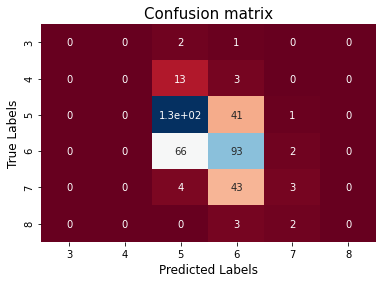

In [24]:
#visualizing confusion matrix
sns.heatmap(cm,annot=True,cbar=False,cmap='RdBu')
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted Labels',fontsize = 12)
plt.ylabel('True Labels',fontsize = 12)
plt.xticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.yticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.show()

In [25]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_dict ={'penalty' : ['l1', 'l2'],
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['liblinear']}

log_model=LogisticRegression(random_state=42)

gcv=GridSearchCV(log_model,param_dict,cv=3)
gcv.fit(x_train,y_train)
print('Tuned:',gcv.best_params_)
print("Mean of the cv scores:",gcv.best_score_)
print("Train Score:",gcv.score(x_train,y_train))
print("Test Score:",gcv.score(x_test,y_test))

Tuned: {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}
Mean of the cv scores: 0.5730809674027341
Train Score: 0.5856992639327024
Test Score: 0.5686274509803921


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Using Decision Tree

In [26]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=4,random_state=42)

In [27]:
#trainin the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [28]:
# testing the model on train data
x_train_pred=clf.predict(x_train)

# checking its accuracy
acc_train=accuracy_score(y_train,x_train_pred)
pre_train=precision_score(y_train,x_train_pred,average='macro')
f1_train=f1_score(y_train,x_train_pred,average='macro')
recall_train=recall_score(y_train,x_train_pred,average='macro')
print('Accuracy on train data:',acc_train)
print('Precision on train data:',pre_train)
print('F1 score on train data:',f1_train)
print('Recall on train data:',recall_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on train data: 0.6466876971608833
Precision on train data: 0.4713956037710467
F1 score on train data: 0.3363126814936905
Recall on train data: 0.32528699906393554


In [29]:
# testing the model on test data
x_test_pred=clf.predict(x_test)

# checking its accuracy
acc_test=accuracy_score(y_test,x_test_pred)
pre_test=precision_score(y_test,x_test_pred,average='macro')
f1_test=f1_score(y_test,x_test_pred,average='macro')
recall_test=recall_score(y_test,x_test_pred,average='macro')
print('Accuracy on test data:',acc_train)
print('Precision on test data:',pre_train)
print('F1 score on test data:',f1_train)
print('Recall on test data:',recall_train)

Accuracy on test data: 0.6466876971608833
Precision on test data: 0.4713956037710467
F1 score on test data: 0.3363126814936905
Recall on test data: 0.32528699906393554


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print('Classification Report:',classification_report(y_test,x_test_pred))

Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.60      0.74      0.66       173
           6       0.53      0.49      0.51       161
           7       0.45      0.40      0.43        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       408
   macro avg       0.26      0.27      0.27       408
weighted avg       0.52      0.56      0.53       408



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, x_test_pred)
cm

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,  15,   1,   0,   0],
       [  0,   2, 128,  39,   4,   0],
       [  0,   0,  64,  79,  18,   0],
       [  0,   0,   2,  28,  20,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

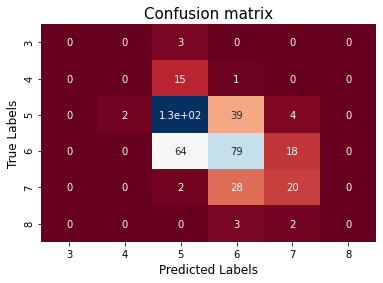

In [32]:
#visualizing confusion matrix
sns.heatmap(cm,annot=True,cbar=False,cmap='RdBu')
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted Labels',fontsize = 12)
plt.ylabel('True Labels',fontsize = 12)
plt.xticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.yticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.show()

<AxesSubplot:>

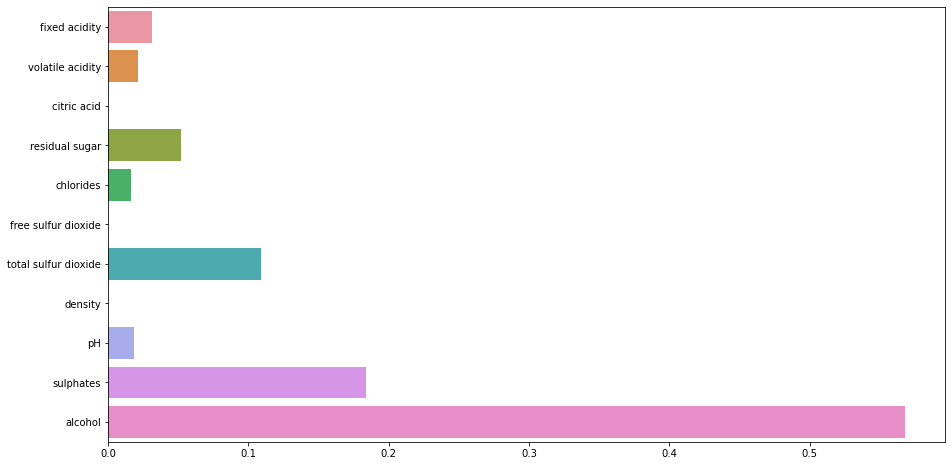

In [33]:
#visualising feature importance
plt.figure(figsize=(15,8))
importance=clf.feature_importances_
X=df.drop('quality',axis=1)
sns.barplot(x=importance,y=X.columns)

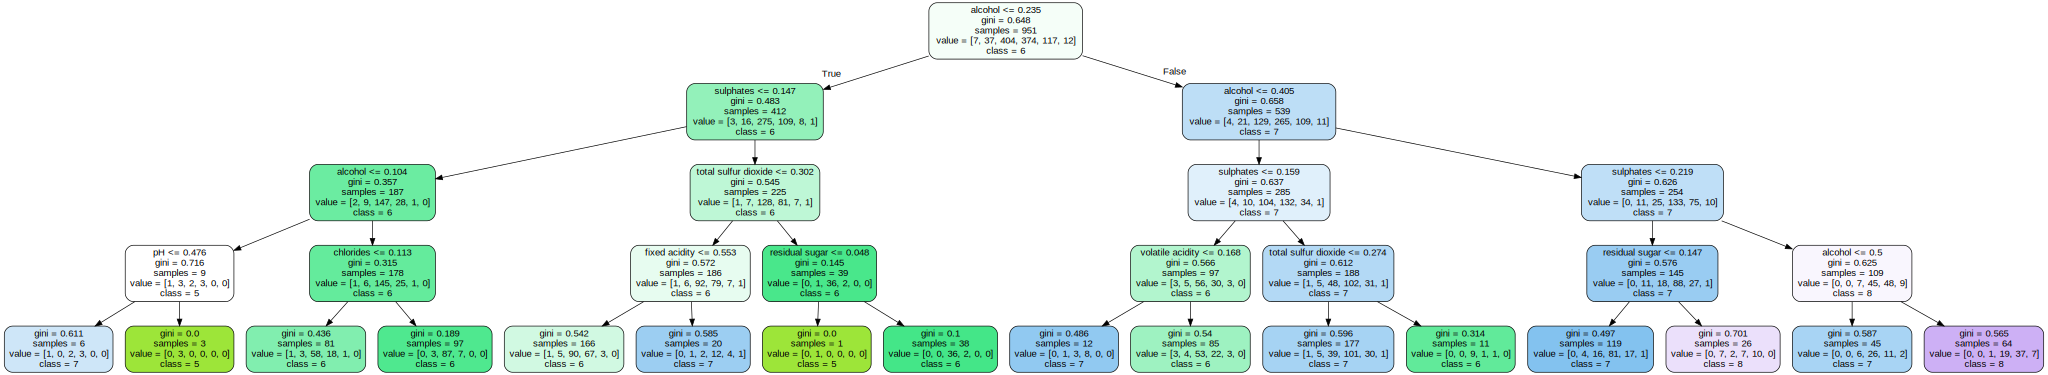

In [34]:
#visualizing the tree
import os
from sklearn.tree import export_graphviz

os.environ['PATH']=';'+r'C:/ProgramData/Anaconda3/Library/bin/graphviz'
import graphviz
tree=export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=['4', '5', '6', '7', '8'],
                     filled=True, rounded=True)
tree_graph=graphviz.Source(tree)
tree_graph

In [35]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_dict={'criterion':['gini','entropy'],
    'max_depth':range(1,10,2),
            'max_features':['auto','sqrt','log2'],
           'ccp_alpha':[0.00001,0.001,0.01,0.1,1,2]}
tree_model=DecisionTreeClassifier(random_state=42)

gcv=GridSearchCV(tree_model,param_dict,cv=3)
gcv.fit(x_train,y_train)
print('Tuned:',gcv.best_params_)
print("Mean of the cv scores:",gcv.best_score_)
print("Train Score:",gcv.score(x_train,y_train))
print("Test Score:",gcv.score(x_test,y_test))

Tuned: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Mean of the cv scores: 0.5520504731861199
Train Score: 0.6077812828601472
Test Score: 0.5686274509803921


#### Using KNearestNeighbours

In [36]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# initialising the model
knn=KNeighborsClassifier(n_neighbors=3)

In [38]:
# training the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# testing the model on train data
x_train_pred=knn.predict(x_train)

# checking its accuracy
acc_train=accuracy_score(y_train,x_train_pred)
pre_train=precision_score(y_train,x_train_pred,average='macro')
f1_train=f1_score(y_train,x_train_pred,average='macro')
recall_train=recall_score(y_train,x_train_pred,average='macro')
print('Accuracy on train data:',acc_train)
print('Precision on train data:',pre_train)
print('F1 score on train data:',f1_train)
print('Recall on train data:',recall_train)

Accuracy on train data: 0.7486855941114616
Precision on train data: 0.7033320297453908
F1 score on train data: 0.5705487557489691
Recall on train data: 0.5458532996389722


In [40]:
# testing the model on test data
x_test_pred=knn.predict(x_test)

# checking its accuracy
acc_test=accuracy_score(y_test,x_test_pred)
pre_test=precision_score(y_test,x_test_pred,average='macro')
f1_test=f1_score(y_test,x_test_pred,average='macro')
recall_test=recall_score(y_test,x_test_pred,average='macro')
print('Accuracy on test data:',acc_train)
print('Precision on test data:',pre_train)
print('F1 score on test data:',f1_train)
print('Recall on test data:',recall_train)

Accuracy on test data: 0.7486855941114616
Precision on test data: 0.7033320297453908
F1 score on test data: 0.5705487557489691
Recall on test data: 0.5458532996389722


In [41]:
print('Classification Report:',classification_report(y_test,x_test_pred))

Classification Report:               precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00        16
           5       0.56      0.66      0.61       173
           6       0.49      0.44      0.47       161
           7       0.51      0.42      0.46        50
           8       0.00      0.00      0.00         5

    accuracy                           0.51       408
   macro avg       0.34      0.31      0.32       408
weighted avg       0.50      0.51      0.50       408



In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, x_test_pred)
cm

array([[  1,   1,   0,   1,   0,   0],
       [  0,   0,  12,   4,   0,   0],
       [  1,   8, 115,  45,   4,   0],
       [  0,   4,  72,  71,  14,   0],
       [  0,   1,   7,  20,  21,   1],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

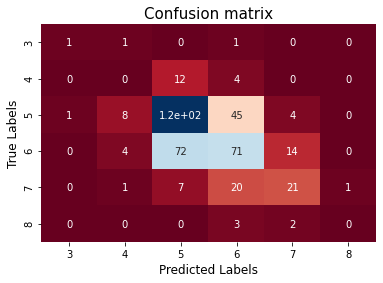

In [43]:
#visualizing confusion matrix

sns.heatmap(cm,annot=True,cbar=False,cmap='RdBu')
plt.title('Confusion matrix',fontsize=15)
plt.xlabel('Predicted Labels',fontsize = 12)
plt.ylabel('True Labels',fontsize = 12)
plt.xticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.yticks(ticks=np.arange(0.5,6.5),labels=[3,4,5,6,7,8])
plt.show()

In [44]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_dict={'n_neighbors':range(1,30,2),
            'p':[1,2],
           'weights':['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn=KNeighborsClassifier()
gcv=GridSearchCV(knn,param_dict,cv=5)
gcv.fit(x_train,y_train)
print('Tuned:',gcv.best_params_)
print("Mean of the cv scores:",gcv.best_score_)
print("Train Score:",gcv.score(x_train,y_train))
print("Test Score:",gcv.score(x_test,y_test))

Tuned: {'algorithm': 'auto', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Mean of the cv scores: 0.6056820060622762
Train Score: 1.0
Test Score: 0.5784313725490197


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

So among three algorithm with simple tuning parameters KNN works best in training and testing data.

It has higher accuracy on train and test data comparing to Decision tree and Logistic Regression.

Model can be improved by Hyperparameter tuning to select the best parameter